## Justin Sandbox

In [1]:
# Import linraries and modules

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sqlite3 
import calendar


In [3]:
conn = sqlite3.connect('../data/im.db')

In [ ]:
pd.read_sql("""
SELECT *
  FROM movie_ratings;
""", conn)

In [ ]:
df_dirs = pd.read_sql("""
 SELECT *
    FROM 
    movie_basics AS mb
        LEFT JOIN
            (SELECT *
            FROM directors GROUP BY movie_id) AS dr
            ON mb.movie_id = dr.movie_id
""", conn)

In [4]:
df_imdb = pd.read_sql("""
    SELECT *
    FROM 
    movie_basics AS mb
        LEFT JOIN movie_ratings AS mr
            ON mb.movie_id = mr.movie_id
        LEFT JOIN
            (SELECT *
            FROM directors GROUP BY movie_id) AS dr
            ON mb.movie_id = dr.movie_id
        LEFT JOIN persons AS ps
            ON dr.person_id = ps.person_id
""", conn)

In [ ]:
df_dirs.info()

In [ ]:
df_dirs.head()

In [ ]:
df_imdb

In [ ]:
df_imdb[df_imdb['primary_title'].str.contains("Avatar")].sort_values('primary_title')

In [5]:
df_imdb['year_str'] = df_imdb['start_year'].astype(str)

In [6]:
df_imdb['mov_yr_key'] = df_imdb['primary_title'] + "-" + df_imdb['year_str']

In [ ]:
df_imdb.info()

In [ ]:
df_imdb.describe()

In [ ]:
df_imdb.sort_values('runtime_minutes', ascending=False)

In [ ]:
df_imdb.head(50)

In [7]:
df_imdb[['Genre_1','Genre_2', 'Genre_3']]=df_imdb["genres"].str.split(",",expand=True)

In [8]:
df_imdb['rating_relative_to_avg'] = df_imdb['averagerating'] - df_imdb['averagerating'].mean()

In [ ]:
df_imdb.sort_values('primary_title')[12000:12050]

In [9]:
df_gen_cnt = df_imdb[['Genre_1', 'Genre_2', 'Genre_3']].apply(pd.Series.value_counts)

In [10]:
df_gen_cnt = df_gen_cnt.fillna(0)

In [17]:
df_gen_cnt['total_gen_cnt'] = df_gen_cnt['Genre_1'] + df_gen_cnt['Genre_2'] + df_gen_cnt['Genre_3']

In [18]:
df_genres = df_imdb.loc[:, ["Genre_1","Genre_2","Genre_3", "averagerating", "numvotes", 'start_year']]

In [19]:
df_genres = df_genres.dropna(subset=['averagerating'])

In [ ]:
df_genres.head()

In [ ]:
df_genres.info()

In [ ]:
len(lst_genres)

In [ ]:
test = []

# for gen in lst_genres:
#     rating_sum = 0
#     rating_count = 1
#     for movie in df_genres:
#         if gen in movie:
#             rating_sum = rating_sum + df_genres['averagerating']
#             rating_count += 1
#     avg_gen_rating = rating_sum / rating_count
#     test.append(avg_gen_rating)

tl = []
for gen in lst_genres:
    ratings=[]
    ratings.append(gen)
    for mov in enumerate(df_genres):
        if "Action" in mov['Genre_1']:
            ratings.append(mov['averagerating'])
    tl.append(ratings)

tl



In [20]:


df_genres[(df_genres['numvotes'] >= 100000) & (df_genres['start_year'] >= 2012)].groupby(['Genre_1', 'Genre_2', 'Genre_3']).mean().sort_values('averagerating', ascending=False)

df_top10_gen_comb_rat = df_genres[(df_genres['numvotes'] >= 100000) & (df_genres['start_year'] >= 2012)].groupby(['Genre_1', 'Genre_2', 'Genre_3']).mean().sort_values('averagerating', ascending=False)[:10]
df_top10_gen_comb_rat

averagerating   numvotes  start_year
Genre_1   Genre_2   Genre_3                                       
Action    Drama     War               8.450  241280.50     2015.00
Animation Drama     Fantasy           8.400  134084.00     2016.00
Adventure Drama     Sci-Fi            8.300  989725.00     2014.50
Comedy    Drama     Thriller          8.100  151123.00     2014.00
                    Fantasy           8.000  200574.00     2013.50
Biography Drama     Music             8.000  345466.00     2018.00
Action    Biography Drama             7.850  291407.75     2014.00
Drama     Music     Romance           7.800  249245.00     2018.00
          Mystery   Sci-Fi            7.775  385403.75     2015.25
Biography Drama     Thriller          7.700  415517.00     2013.75

In [21]:
lst_genres = list(df_gen_cnt.index)
lst_genres

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

In [ ]:
df_gen_cnt

In [23]:
df_gen_cnt.sort_values('total_gen_cnt', ascending=False)
top10_gen_cnt = df_gen_cnt.sort_values('total_gen_cnt', ascending=False)[0:10]

<BarContainer object of 10 artists>

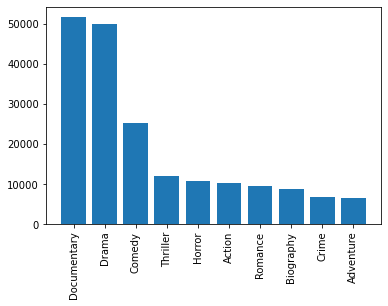

In [24]:
fig, ax = plt.subplots()

x = top10_gen_cnt.index
y = top10_gen_cnt['total_gen_cnt']

plt.xticks(rotation=90)

ax.bar(x,y)

In [25]:
#Top 50 movies by rating with at least 100,000 votes and released no later than 2012
df_top50_rat = df_imdb[(df_imdb['numvotes'] >= 100000) & (df_imdb['start_year'] >= 2012)].sort_values('averagerating', ascending=False)[0:50]

In [ ]:
df_top50_rat

In [27]:
df_top10_rat = df_top50_rat[0:10]

<ipython-input-28-bf6992674d5c>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x1, rotation=80)
<ipython-input-28-bf6992674d5c>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x2, rotation=80)


<BarContainer object of 10 artists>

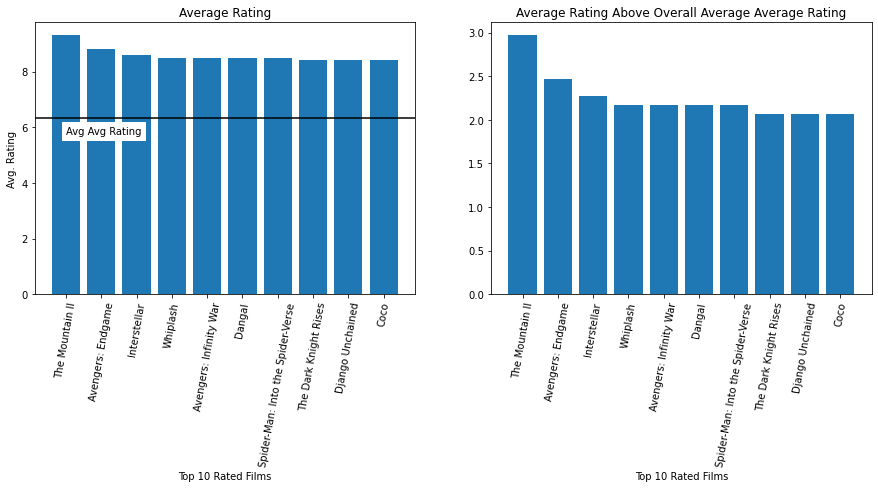

In [28]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

x1 = df_top10_rat['primary_title']
y1 = df_top10_rat['averagerating']

x2 = df_top10_rat['primary_title']
y2 = df_top10_rat['rating_relative_to_avg']

ax1.axhline(6.332729, c="black")
ax1.text(0,5.75,"Avg Avg Rating", backgroundcolor="White")

ax1.set_xticklabels(x1, rotation=80)
ax2.set_xticklabels(x2, rotation=80)

ax1.set_xlabel("Top 10 Rated Films")
ax1.set_ylabel("Avg. Rating")

ax2.set_xlabel("Top 10 Rated Films")
ax.set_ylabel("Avg. Rating Above Avg. Avg. Rating")

ax1.set_title("Average Rating")
ax2.set_title("Average Rating Above Overall Average Average Rating")

ax1.bar(x1,y1)
ax2.bar(x2,y2)

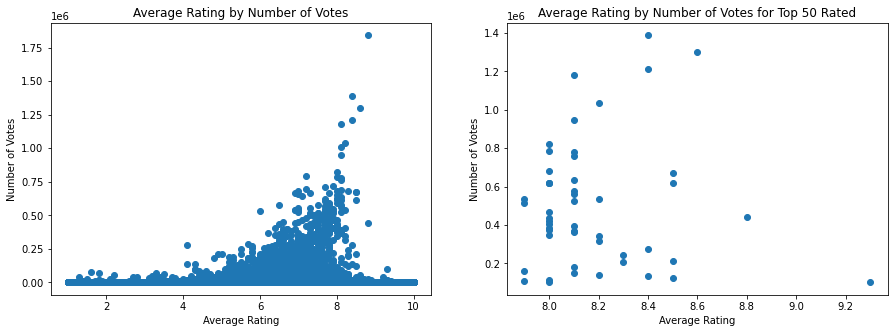

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

x1 = df_imdb['averagerating']
y1 = df_imdb['numvotes']

x2 = df_top50_rat['averagerating']
y2 = df_top50_rat['numvotes']


ax1.set_xlabel("Average Rating")
ax1.set_ylabel("Number of Votes")
ax1.set_title("Average Rating by Number of Votes")

ax2.set_xlabel("Average Rating")
ax2.set_ylabel("Number of Votes")
ax2.set_title("Average Rating by Number of Votes for Top 50 Rated")

ax1.scatter(x1,y1)
ax2.scatter(x2,y2)

In [ ]:
round(df_imdb['averagerating'].corr(df_imdb['numvotes']), 2)

In [30]:
df_im_run_noout = df_imdb[df_imdb['runtime_minutes'] < 1000 ]

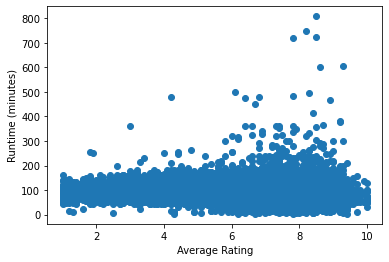

In [31]:
fig, ax = plt.subplots()

x = df_im_run_noout['averagerating']
y = df_im_run_noout['runtime_minutes']

ax.set_xlabel("Average Rating")
ax.set_ylabel("Runtime (minutes)")

ax.scatter(x,y)

In [32]:
dir_mul_top50 = df_top50_rat.value_counts('primary_name')[0:7]


type(dir_mul_top50)

pandas.core.series.Series

In [33]:
df_top50_rat[df_top50_rat['primary_name'] == 'Denis Villeneuve']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,movie_id,...,primary_name,birth_year,death_year,primary_profession,year_str,mov_yr_key,Genre_1,Genre_2,Genre_3,rating_relative_to_avg
7215,tt1392214,Prisoners,Prisoners,2013,153.0,"Crime,Drama,Mystery",tt1392214,8.1,526273.0,tt1392214,...,Denis Villeneuve,1967.0,NaN,"director,writer,editor",2013,Prisoners-2013,Crime,Drama,Mystery,1.767271
20468,tt1856101,Blade Runner 2049,Blade Runner 2049,2017,164.0,"Drama,Mystery,Sci-Fi",tt1856101,8.0,376241.0,tt1856101,...,Denis Villeneuve,1967.0,NaN,"director,writer,editor",2017,Blade Runner 2049-2017,Drama,Mystery,Sci-Fi,1.667271
42473,tt2543164,Arrival,Arrival,2016,116.0,"Drama,Mystery,Sci-Fi",tt2543164,7.9,515483.0,tt2543164,...,Denis Villeneuve,1967.0,NaN,"director,writer,editor",2016,Arrival-2016,Drama,Mystery,Sci-Fi,1.567271


In [ ]:
fig, ax = plt.subplots()

x = dir_mul_top50.index
y = dir_mul_top50.values

ax.set_xlabel('Movies in Top 50')
ax.set_ylabel('Director')
ax.set_title('Directors with More Than One Movie in Top 50\n with at Least 100000 votes Since 2012')

ax.barh(x,y)
plt.gca().invert_yaxis()

fig.savefig('../images/dirs_top_top_50.png')

# BOM

In [34]:
df_bom = pd.read_csv('../data/bom.movie_gross.csv')

In [35]:
df_bom.sort_values('foreign_gross', ascending=False)

,title,studio,domestic_gross,foreign_gross,year
1805,Life's a Breeze,Magn.,3500.0,99700,2014
1331,The East,FoxS,2300000.0,99700,2013
302,White Lion,Scre.,NaN,99600,2010
2906,A United Kingdom,FoxS,3900000.0,9900000,2017
510,Le Havre,Jan.,612000.0,9900000,2011
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [36]:
df_bom['foreign_gross'] = df_bom['foreign_gross'].str.replace(",","")
df_bom['foreign_gross'] = df_bom['foreign_gross'].astype(float)

In [37]:
df_bom['total_gross'] = df_bom['foreign_gross'] + df_bom['domestic_gross']

In [ ]:
df_bom.sort_values('foreign_gross')[0:25]

In [ ]:
df_bom.info()

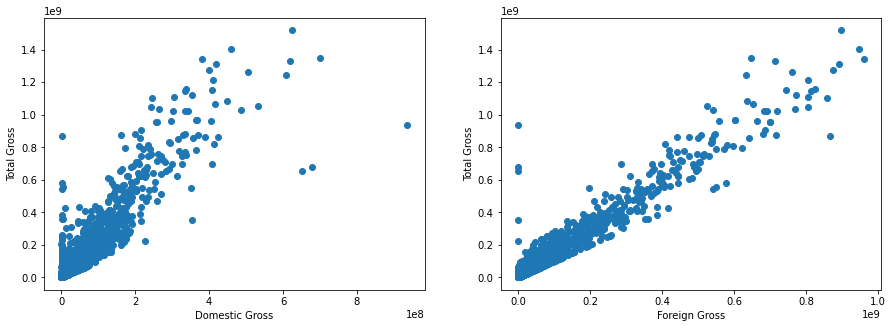

In [38]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

x1 = df_bom['domestic_gross']
y1 = df_bom['total_gross']

x2 = df_bom['foreign_gross']
y2 = df_bom['total_gross']

ax1.set_xlabel("Domestic Gross")
ax1.set_ylabel("Total Gross")

ax2.set_xlabel("Foreign Gross")
ax2.set_ylabel("Total Gross")

ax1.scatter(x1, y1)
ax2.scatter(x2, y2)

In [39]:
df_bom['domestic_gross'].corr(df_bom['total_gross'])

0.9045480373460375

In [40]:
df_bom['foreign_gross'].corr(df_bom['total_gross'])

0.9677590546498869

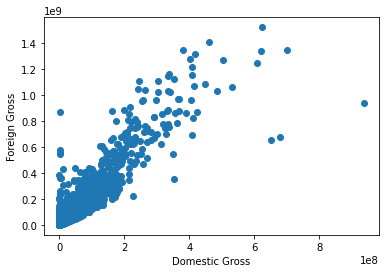

In [41]:
fig, ax = plt.subplots()

x = df_bom['domestic_gross']
y = df_bom['total_gross']

ax.set_xlabel("Domestic Gross")
ax.set_ylabel("Foreign Gross")

ax.scatter(x,y)

Mox Office Movies

In [ ]:
df_bom.groupby('studio').sum().sort_values('total_gross', ascending=False)

In [42]:
df_bom_filt = df_bom[df_bom['year'] >= 2012]

In [ ]:
df_bom_filt.groupby('studio').sum().sort_values('total_gross', ascending=False)

In [43]:
top10_stud_filt = df_bom_filt.groupby('studio').sum().sort_values('total_gross', ascending=False)[:10]
top10_stud_filt

,domestic_gross,foreign_gross,year,total_gross
studio,,,,
BV,1.570240e+10,2.117251e+10,157157,3.686251e+10
Fox,8.967700e+09,1.702962e+10,209547,2.597232e+10
Uni.,1.105189e+10,1.457537e+10,235767,2.561691e+10
WB,9.073773e+09,1.416202e+10,209564,2.319382e+10
Sony,6.550983e+09,1.149014e+10,175332,1.804092e+10
Par.,5.298605e+09,9.049485e+09,159185,1.424340e+10
WB (NL),3.416300e+09,5.567200e+09,72549,8.962900e+09
LGF,3.427902e+09,3.811285e+09,161198,7.106475e+09
LG/S,2.078200e+09,3.353724e+09,82599,5.318924e+09


<BarContainer object of 10 artists>

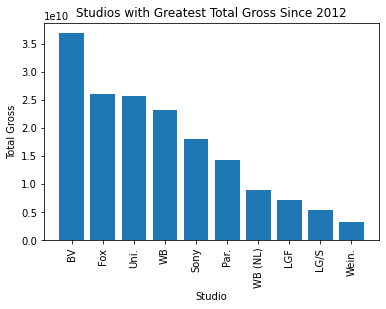

In [44]:
fig, ax = plt.subplots()

x = top10_stud_filt.index
y = top10_stud_filt['total_gross']

ax.set_xlabel("Studio")
ax.set_ylabel("Total Gross")
ax.set_title("Studios with Greatest Total Gross Since 2012")

plt.xticks(rotation=90)

ax.bar(x,y)

In [29]:
stud_top_num_mov = df_bom_filt.value_counts(subset='studio')[:10]
stud_top_num_mov

studio
Uni.     117
IFC      111
Fox      104
WB       104
Magn.     99
SPC       88
Sony      87
LGF       80
Par.      79
BV        78
dtype: int64

<BarContainer object of 10 artists>

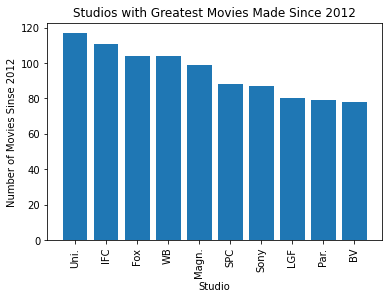

In [30]:
fig, ax = plt.subplots()

x = stud_top_num_mov.index
y = stud_top_num_mov.values

ax.set_xlabel("Studio")
ax.set_ylabel("Number of Movies Sinse 2012")
ax.set_title("Studios with Greatest Movies Made Since 2012")

plt.xticks(rotation=90)

ax.bar(x,y)

# TN

In [45]:
df_tn = pd.read_csv('../data/tn.movie_budgets.csv')

In [32]:
df_tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [46]:
df_tn['production_budget'] = df_tn['production_budget'].str.replace(",","")
df_tn['production_budget'] = df_tn['production_budget'].str.replace("$","")

df_tn['worldwide_gross'] = df_tn['worldwide_gross'].str.replace(",","")
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].str.replace("$","")

df_tn['domestic_gross'] = df_tn['worldwide_gross'].str.replace(",","")
df_tn['domestic_gross'] = df_tn['worldwide_gross'].str.replace("$","")

In [47]:
# Convert the data type of the 'release_date' column to a date
df_tn['release_date'] = pd.to_datetime(df_tn['release_date'],format="%b %d, %Y")

# Add a new columns 'year'
df_tn['release_year'] = df_tn['release_date'].dt.year

# Create key column movie + year
df_tn['release_year'] = df_tn['release_year'].astype(str)
df_tn['mov_yr_key'] = df_tn['movie'] + "-" + df_tn['release_year']

In [48]:
df_tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,mov_yr_key
0,1,2009-12-18,Avatar,425000000,2776345279,2776345279,2009,Avatar-2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,1045663875,2011,Pirates of the Caribbean: On Stranger Tides-2011
2,3,2019-06-07,Dark Phoenix,350000000,149762350,149762350,2019,Dark Phoenix-2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,1403013963,2015,Avengers: Age of Ultron-2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,1316721747,2017,Star Wars Ep. VIII: The Last Jedi-2017
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,2018,Red 11-2018
5778,79,1999-04-02,Following,6000,240495,240495,1999,Following-1999
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,2005,Return to the Land of Wonders-2005
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,2015,A Plague So Pleasant-2015


In [49]:
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].astype('int64')
df_tn['production_budget'] = df_tn['production_budget'].astype('int64')
df_tn['domestic_gross'] = df_tn['domestic_gross'].astype('int64')

In [50]:
df_tn_dna = df_tn.dropna(subset=['worldwide_gross'])
df_tn_dna = df_tn_dna.dropna(subset=['production_budget'])

In [51]:
df_tn_dna['worldwide_profit'] = df_tn_dna['worldwide_gross'] - df_tn_dna['production_budget']

# TM IMDB MERGE

In [39]:
df_tn_dna

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,mov_yr_key,worldwide_profit
0,1,2009-12-18,Avatar,425000000,2776345279,2776345279,2009,Avatar-2009,2351345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,1045663875,2011,Pirates of the Caribbean: On Stranger Tides-2011,635063875
2,3,2019-06-07,Dark Phoenix,350000000,149762350,149762350,2019,Dark Phoenix-2019,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,1403013963,2015,Avengers: Age of Ultron-2015,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,1316721747,2017,Star Wars Ep. VIII: The Last Jedi-2017,999721747
...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,2018,Red 11-2018,-7000
5778,79,1999-04-02,Following,6000,240495,240495,1999,Following-1999,234495
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,2005,Return to the Land of Wonders-2005,-3662
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,2015,A Plague So Pleasant-2015,-1400


In [52]:
df_tn_imdb = df_tn_dna.merge(df_imdb,how='inner',left_on='mov_yr_key', right_on='mov_yr_key',suffixes=('_tn', '_imdb'))

In [44]:
df_tn_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547 entries, 0 to 1546
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      1547 non-null   int64         
 1   release_date            1547 non-null   datetime64[ns]
 2   movie                   1547 non-null   object        
 3   production_budget       1547 non-null   int64         
 4   domestic_gross          1547 non-null   int64         
 5   worldwide_gross         1547 non-null   int64         
 6   release_year            1547 non-null   object        
 7   mov_yr_key              1547 non-null   object        
 8   worldwide_profit        1547 non-null   int64         
 9   movie_id                1547 non-null   object        
 10  primary_title           1547 non-null   object        
 11  original_title          1547 non-null   object        
 12  start_year              1547 non-null   int64   

In [49]:
df_tn_imdb['pretty_gens'] = np.NaN

In [55]:
gens_rating = df_tn_imdb.loc[:, ["Genre_1","Genre_2","Genre_3", "averagerating", "numvotes", 'start_year']]

In [58]:
gens_rating_filt = gens_rating[(gens_rating['numvotes'] >= 100000) & (df_imdb['start_year'] >= 2012)]

<ipython-input-58-906ffb2eac56>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gens_rating_filt = gens_rating[(gens_rating['numvotes'] >= 100000) & (df_imdb['start_year'] >= 2012)]


In [60]:
gens_rating_filt = gens_rating_filt.loc[:, ["Genre_1","Genre_2","Genre_3", "averagerating",]]

In [61]:
gens_rating_filt

,Genre_1,Genre_2,Genre_3,averagerating
0,Action,Adventure,Fantasy,6.6
2,Action,Adventure,Sci-Fi,7.3
3,Action,Adventure,Sci-Fi,8.5
4,Action,Adventure,Fantasy,6.5
5,Action,Adventure,Thriller,6.8
...,...,...,...,...
1383,Drama,Mystery,Thriller,7.0
1398,Drama,None,None,7.4
1425,Drama,Romance,None,7.4
1434,Drama,Romance,Sci-Fi,7.4


In [88]:
# average averge ratign where loc cols = action
testt = gens_rating_filt.groupby(['Genre_1', 'Genre_2','Genre_3']).mean().reset_index(inplace=False)

In [74]:
ind = pd.Series(range(0,77))
ind

0      0
1      1
2      2
3      3
4      4
      ..
72    72
73    73
74    74
75    75
76    76
Length: 77, dtype: int64

In [89]:
testt

,Genre_1,Genre_2,Genre_3,averagerating
0,Action,Adventure,Animation,7.385714
1,Action,Adventure,Biography,7.550000
2,Action,Adventure,Comedy,6.842857
3,Action,Adventure,Crime,6.933333
4,Action,Adventure,Drama,6.055556
...,...,...,...,...
72,Drama,Sci-Fi,Thriller,6.950000
73,Fantasy,Horror,Thriller,6.500000
74,Horror,Mystery,Thriller,6.700000
75,Horror,Sci-Fi,Thriller,6.400000


In [85]:
es

,averagerating,ind
0,7.385714,NaN
1,7.550000,NaN
2,6.842857,NaN
3,6.933333,NaN
4,6.055556,NaN
...,...,...
72,6.950000,NaN
73,6.500000,NaN
74,6.700000,NaN
75,6.400000,NaN


In [62]:
pd.get_dummies(gens_rating_filt)

,averagerating,Genre_1_Action,Genre_1_Adventure,Genre_1_Biography,Genre_1_Comedy,Genre_1_Crime,Genre_1_Drama,Genre_1_Fantasy,Genre_1_Horror,Genre_1_Mystery,...,Genre_3_Horror,Genre_3_Music,Genre_3_Musical,Genre_3_Mystery,Genre_3_Romance,Genre_3_Sci-Fi,Genre_3_Sport,Genre_3_Thriller,Genre_3_War,Genre_3_Western
0,6.6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,8.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,6.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6.8,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383,7.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1398,7.4,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1425,7.4,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1434,7.4,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [50]:
for gen in df_tn_imdb:
    if gen['Genre_3'].notnull() == True:
            gen['pretty_gens'] = df_tn_imdb['Genre_1'] + " - " + df_tn_imdb['Genre_2'] + " - " + df_tn_imdb['Genre_3']
    elif gen['Genre_2'].notnull() == True:
            gen['pretty_gens'] = df_tn_imdb['Genre_1'] + " - " + df_tn_imdb['Genre_2']
    elif gen['Genre_1'].notnull() == True:
            gen['pretty_gens'] = df_tn_imdb['Genre_1']
    else:
        gen['pretty_gens'] = np.NaN

TypeError: string indices must be integers

In [ ]:
df_tn_imdb.sort_values('worldwide_profit', ascending=False)

In [53]:
df_tn_imdb_filt = df_tn_imdb[(df_tn_imdb['numvotes'] >= 100000) & (df_imdb['start_year'] >= 2012)]

<ipython-input-53-efdde6b187b4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tn_imdb_filt = df_tn_imdb[(df_tn_imdb['numvotes'] >= 100000) & (df_imdb['start_year'] >= 2012)]


In [54]:
top10_dirs_profit = df_tn_imdb_filt.groupby('primary_name').mean().sort_values('worldwide_profit', ascending=False)[0:10]
top10_dirs_profit

,id,production_budget,domestic_gross,worldwide_gross,worldwide_profit,start_year,runtime_minutes,averagerating,numvotes,birth_year,death_year,rating_relative_to_avg
primary_name,,,,,,,,,,,,
Anthony Russo,11.5,235000000.0,1.381268e+09,1.381268e+09,1.146268e+09,2016.0,142.5,8.15,668589.0,1970.0,NaN,1.817271
J.A. Bayona,13.0,170000000.0,1.305773e+09,1.305773e+09,1.135773e+09,2018.0,128.0,6.20,219125.0,1975.0,NaN,-0.132729
Pierre Coffin,73.0,74000000.0,1.160336e+09,1.160336e+09,1.086336e+09,2015.0,91.0,6.40,193917.0,1967.0,NaN,0.067271
Joss Whedon,4.0,330600000.0,1.403014e+09,1.403014e+09,1.072414e+09,2015.0,141.0,7.30,665594.0,1964.0,NaN,0.967271
Brad Bird,44.0,200000000.0,1.242521e+09,1.242521e+09,1.042521e+09,2018.0,118.0,7.70,203510.0,1957.0,NaN,1.367271
Shane Black,48.0,200000000.0,1.215392e+09,1.215392e+09,1.015392e+09,2013.0,130.0,7.20,692794.0,1961.0,NaN,0.867271
Jared Bush,57.0,150000000.0,1.019430e+09,1.019430e+09,8.694296e+08,2016.0,108.0,8.00,383446.0,1974.0,NaN,1.667271
Lee Unkrich,47.0,200000000.0,1.068880e+09,1.068880e+09,8.688795e+08,2010.0,103.0,8.30,682218.0,1967.0,NaN,1.967271
Gareth Edwards,45.0,200000000.0,1.049103e+09,1.049103e+09,8.491029e+08,2016.0,133.0,7.80,478592.0,1975.0,NaN,1.467271


<BarContainer object of 10 artists>

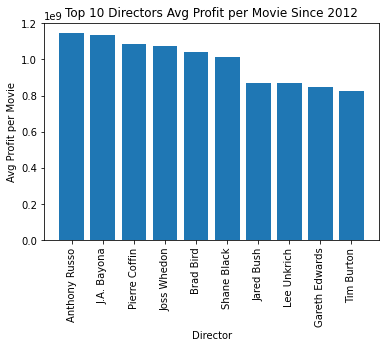

In [55]:
fig, ax = plt.subplots()

x = top10_dirs_profit.index
y = top10_dirs_profit['worldwide_profit']

ax.set_xlabel("Director")
ax.set_ylabel("Avg Profit per Movie")
ax.set_title("Top 10 Directors Avg Profit per Movie Since 2012")

plt.xticks(rotation=90)

ax.bar(x,y)

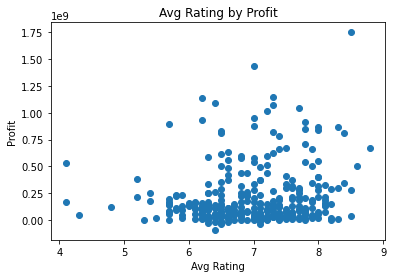

In [56]:
fig, ax = plt.subplots()

x = df_tn_imdb_filt['averagerating']
y = df_tn_imdb_filt['worldwide_profit']

ax.set_xlabel("Avg Rating")
ax.set_ylabel("Profit")
ax.set_title("Avg Rating by Profit")



ax.scatter(x,y)

In [57]:
df_tn_imdb_filt['averagerating'].corr(df_tn_imdb_filt['worldwide_profit'])

0.14375206103201144

In [58]:
df_tn_imdb_filt['production_budget'].corr(df_tn_imdb_filt['worldwide_profit'])

0.6237389744636805

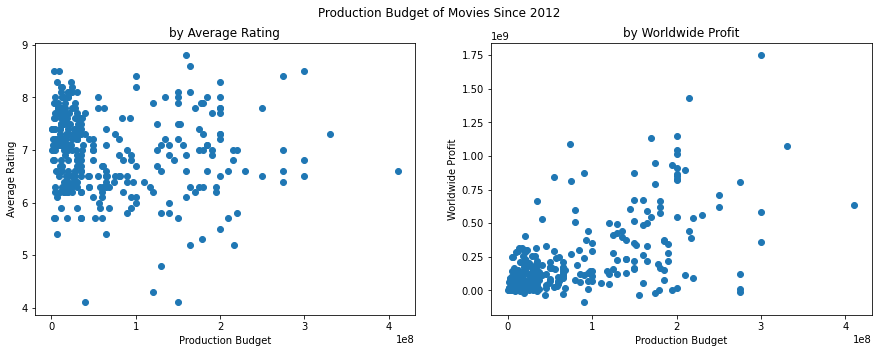

In [71]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

plt.suptitle("Production Budget of Movies Since 2012")

x1 = df_tn_imdb_filt['production_budget']
y1 = df_tn_imdb_filt['averagerating']

x2 = df_tn_imdb_filt['production_budget']
y2 = df_tn_imdb_filt['worldwide_profit']


ax1.set_xlabel("Production Budget")
ax1.set_ylabel("Average Rating")
ax1.set_title("by Average Rating")

ax2.set_xlabel("Production Budget")
ax2.set_ylabel("Worldwide Profit")
ax2.set_title("by Worldwide Profit")

ax1.scatter(x1, y1)
ax2.scatter(x2, y2)

In [65]:
df_tn_imdb_filt['production_budget'].corr(df_tn_imdb_filt['averagerating'])

-0.09842752224249707

In [66]:
df_tn_imdb_filt['production_budget'].corr(df_tn_imdb_filt['worldwide_profit'])

0.6237389744636805

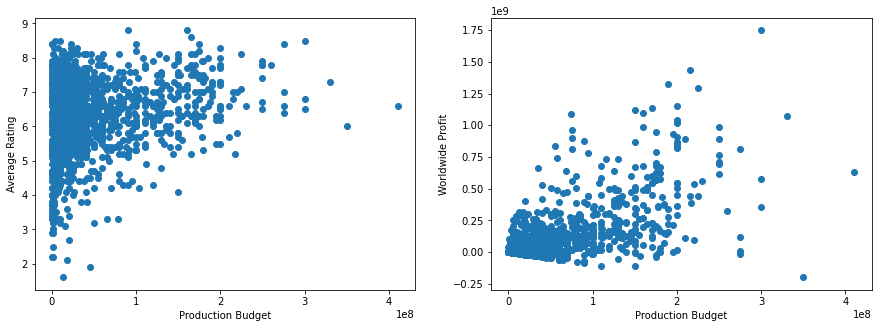

In [64]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

x1 = df_tn_imdb['production_budget']
y1 = df_tn_imdb['averagerating']

x2 = df_tn_imdb['production_budget']
y2 = df_tn_imdb['worldwide_profit']

ax1.set_xlabel("Production Budget")
ax1.set_ylabel("Average Rating")

ax2.set_xlabel("Production Budget")
ax2.set_ylabel("Worldwide Profit")

ax1.scatter(x1, y1)
ax2.scatter(x2, y2)

In [67]:
df_tn_imdb['production_budget'].corr(df_tn_imdb['averagerating'])

0.2225609389897727

In [68]:
df_tn_imdb['production_budget'].corr(df_tn_imdb['worldwide_profit'])

0.6622588394897604